In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [85]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [86]:
# Lista de columnas a eleminar
columnas_drop = ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']

df = df.drop(columnas_drop, axis=1)

print(df.head())


   MedInc  Latitude  Longitude
0  8.3252     37.88    -122.23
1  8.3014     37.86    -122.22
2  7.2574     37.85    -122.24
3  5.6431     37.85    -122.25
4  3.8462     37.85    -122.25


In [87]:
# Entrenar el modelo K-Means e predecir clusters 
# Predecimos 6 clusters
kmeans_model = KMeans(n_clusters=6, random_state=42)
kmeans_model.fit(df)

clusters = kmeans_model.predict(df)

# Agregar la información del cluster al conjunto de datos como una nueva columna
df['cluster'] = clusters

# Dividir el conjunto de datos en entrenamiento y prueba
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)


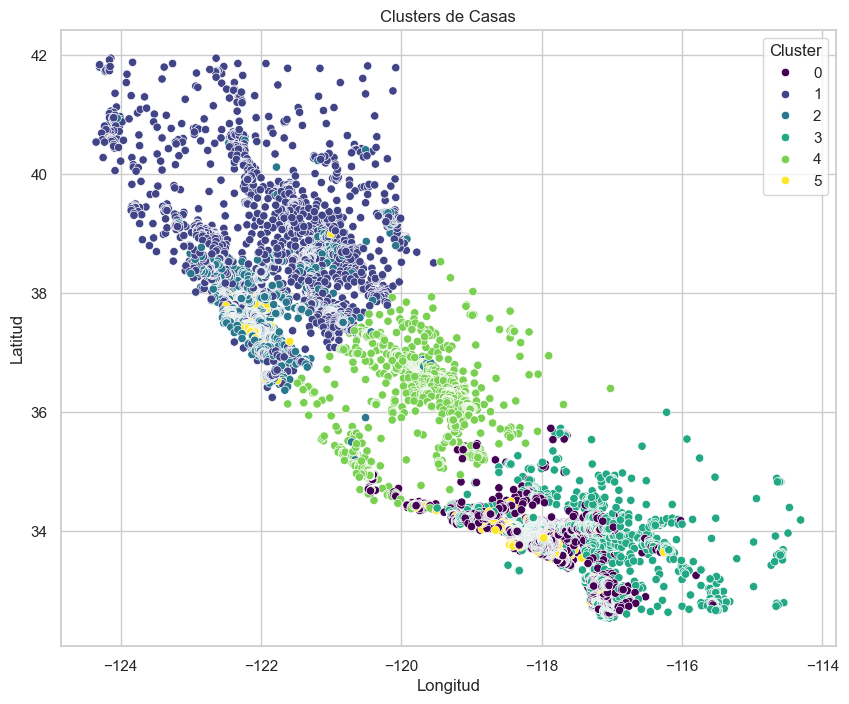

In [88]:
# Graficar los clusteres en un diagrama de dispersión
# Configuración de estilo
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='cluster', palette='viridis', data=df)
plt.title('Clusters de Casas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

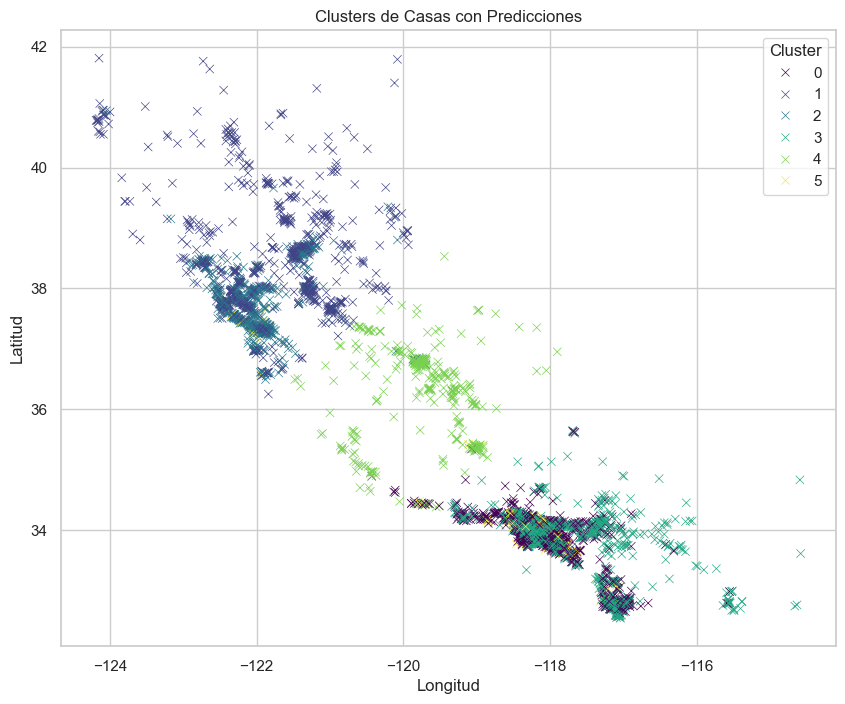

In [89]:
# Predicciones en el conjunto de prueba
predictions_test = kmeans_model.predict(test_data.drop('cluster', axis=1))

# Añadir las predicciones al DataFrame del conjunto de prueba
test_data['predicted_cluster'] = predictions_test

# Graficar los clusters en un diagrama de dispersión con predicciones
plt.figure(figsize=(10, 8))

# Graficar los clusters predichos en el conjunto de prueba
sns.scatterplot(x='Longitude', y='Latitude', hue='predicted_cluster', palette='viridis', marker='x', data=test_data)

plt.title('Clusters de Casas con Predicciones')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [91]:
# Separar las características y las etiquetas en el conjunto de entrenamiento
X_train = train_data.drop(['cluster'], axis=1)
y_train = train_data['cluster']

# Separar las características y las etiquetas en el conjunto de prueba
X_test = test_data.drop(['cluster', 'predicted_cluster'], axis=1)
y_test = test_data['predicted_cluster']

# Entrenar el modelo de Regresión Logística en el conjunto de entrenamiento
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = logistic_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Precisión del modelo:", accuracy)

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictions))

Precisión del modelo: 0.9152131782945736

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       817
           1       0.85      0.96      0.90       960
           2       0.94      0.95      0.95       519
           3       0.95      0.98      0.97      1388
           4       0.69      0.37      0.48       338
           5       0.93      0.91      0.92       106

    accuracy                           0.92      4128
   macro avg       0.89      0.85      0.86      4128
weighted avg       0.91      0.92      0.91      4128



c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
from joblib import dump

# Especificar la ruta completa donde deseas guardar los modelos
ruta_modelos = "C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Proyecto K-Medias/models"

try:
    # Guardar el modelo de K-Means en la ruta especificada
    dump(kmeans_model, ruta_modelos + 'kmeans_model.joblib')

    # Guardar el modelo de Regresión Logística en la ruta especificada
    dump(logistic_model, ruta_modelos + 'logistic_model.joblib')

    print("Los modelos se guardaron correctamente en la ruta:", ruta_modelos)

except Exception as e:
    print("Ocurrió un error al guardar los modelos:", e)

Los modelos se guardaron correctamente en la ruta: C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Proyecto K-Medias/models
